## Import Libraries

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

## Data Processing
### Merging 12 months of sales data into a single file

Careful with running this chunk of code. It can end up duplicating your rows when run multiple times and you'll end up with 10x the number of rows you should have.

It is recommended that after creating the consolidated csv file this code chunk is commented out.

In [21]:
current_directory = os.getcwd()

files = [file for file in os.listdir('D:\\zappcode\\Python Sales Analysis\\Sales Data\\') if file.endswith('.csv')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('D:\\zappcode\\Python Sales Analysis\\Sales Data\\'+file, low_memory=False)
    all_months_data = pd.concat([all_months_data, df], ignore_index = True)

all_months_data.to_csv("all_data.csv", index=False)

### Load in the updated and cleaned data

There were many rows of NaN values in the data. I cleaned these in excel, saved the data as a csv, and reuploaded it into the notebook.

This can also be accomplished by using: df.dropna(how='any')

In [2]:
df = pd.read_csv("D:\\zappcode\\Python Sales Analysis\\Cleaned Data\\clean_all_data.csv", low_memory=False)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


#### Ensure all NaN values are gone from df

In [3]:
print(df.isna().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


### Augment data with additional columns

There was an issue caused by the concatenating of the monthly sales data. All the headers were appearing as rows in the data causing it to throw off the dtype. These were removed using excel and reuploaded.

In [4]:
# Add the month columnn
df['Month'] = df['Order Date'].str.extract(r'(\d{1,2})/')
df['Month'] = df['Month'].astype("int64")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4


#### Get a descrition of the processed data to ensure everything is as it should be and that there has been no major data loss

In [5]:
description = df[['Quantity Ordered', 'Price Each']].describe().round(2)
description

,Quantity Ordered,Price Each
count,185950.00,185950.00
mean,1.12,184.40
std,0.44,332.73
min,1.00,2.99
25%,1.00,11.95
50%,1.00,14.95
75%,1.00,150.00
max,9.00,1700.00


### Question 1: What was the best month for sales? How much did they earn that month?

In [161]:
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
monthly_sales = df.groupby('Month')['Total Sales'].sum().reset_index()
monthly_sales.sort_values(by = 'Total Sales', ascending=False).head(1)

,Month,Total Sales
11,12,4613443.34


#### Answer

**Best Month:** December

**Sales Earned:** $4,613,443.34

### Question 2: What was the worst month for sales? How much did they earn that month?

In [8]:
monthly_sales.sort_values(by='Total Sales').head(1)

,Month,Total Sales
0,1,1822256.73


#### **Answer**

**Worst Month:** January

**Sales Earned:** $1,822,256.73

### Sales Data Viz

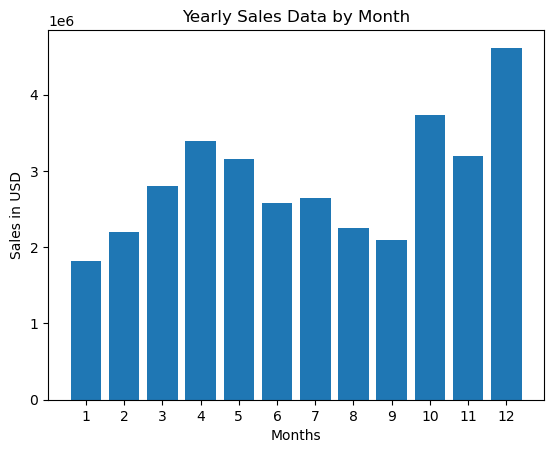

In [9]:
months = range(1,13)
plt.bar(months, monthly_sales['Total Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.title('Yearly Sales Data by Month')
plt.show()

### Question 3: What city had the largest number of sales?

Can also use the python apply() instead of regex functions. For example:

df['Purchase City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

explanation of apply(lambda x: x.split(',')[1]): for each of the cell contents we want to split it by commas and grab the first index

lambda x: what grabs the cell contents

In [107]:
# Regex Method
# reg_pattern = r',\s*(.*?),'
# df['Purchase City'] = df['Purchase Address'].str.extract(reg_pattern)
# df.head()

In [10]:
# apply() Method
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2]

df['Address'] = df['Purchase Address'].apply(lambda x: get_city(x) + ',' + get_state(x)).str.replace(r'\d{5}','', regex=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560,Google Phone,1,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [11]:
city_sales = df.groupby('Address').sum('Total Sales').sort_values(by='Total Sales', ascending=False).reset_index()
city_sales

,Address,Order ID,Quantity Ordered,Price Each,Month,Total Sales
0,"San Francisco, CA",10304443952,50239,8211461.74,315520,8262203.91
1,"Los Angeles, CA",6811084693,33289,5421435.23,208325,5452570.80
2,"New York City, NY",5736333884,27932,4635370.83,175741,4664317.43
3,"Boston, MA",4598265261,22528,3637409.77,141112,3661642.01
4,"Atlanta, GA",3423838407,16602,2779908.20,104794,2795498.58
5,"Dallas, TX",3415643578,16730,2752627.82,104620,2767975.40
6,"Seattle, WA",3406693974,16553,2733296.01,104941,2747755.48
7,"Portland, OR",2305594747,11303,1860558.22,70621,1870732.34
8,"Austin, TX",2280982185,11153,1809873.61,69829,1819581.75
9,"Portland, ME",563266345,2750,447189.25,17144,449758.27


In [12]:
# Merge city_sales and df
merged_df = df.merge(city_sales, on='Address', how='inner', suffixes=('', '_sum'))
merged_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Address,Order ID_sum,Quantity Ordered_sum,Price Each_sum,Month_sum,Total Sales_sum
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",3415643578,16730,2752627.82,104620,2767975.4
1,176569,27in 4K Gaming Monitor,1,389.99,4/16/2019 19:23,"657 Hill St, Dallas, TX 75001",4,389.99,"Dallas, TX",3415643578,16730,2752627.82,104620,2767975.4
2,176570,AA Batteries (4-pack),1,3.84,4/22/2019 15:09,"186 12th St, Dallas, TX 75001",4,3.84,"Dallas, TX",3415643578,16730,2752627.82,104620,2767975.4
3,176577,Apple Airpods Headphones,1,150.00,4/4/2019 19:25,"260 Spruce St, Dallas, TX 75001",4,150.00,"Dallas, TX",3415643578,16730,2752627.82,104620,2767975.4
4,176596,Apple Airpods Headphones,1,150.00,4/27/2019 20:11,"572 Meadow St, Dallas, TX 75001",4,150.00,"Dallas, TX",3415643578,16730,2752627.82,104620,2767975.4


In [31]:
# Clean up the merged dataframe for the plot
merged_df = merged_df.sort_values(by='Total Sales_sum', ascending=False)
columns_drop = ['Order ID_sum', 'Month_sum']
merged_df = merged_df.drop(columns=columns_drop)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 92975 to 185949
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Order ID              185950 non-null  int64  
 1   Product               185950 non-null  object 
 2   Quantity Ordered      185950 non-null  int64  
 3   Price Each            185950 non-null  float64
 4   Order Date            185950 non-null  object 
 5   Purchase Address      185950 non-null  object 
 6   Month                 185950 non-null  int64  
 7   Total Sales           185950 non-null  float64
 8   Address               185950 non-null  object 
 9   Quantity Ordered_sum  185950 non-null  int64  
 10  Price Each_sum        185950 non-null  float64
 11  Total Sales_sum       185950 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 18.4+ MB


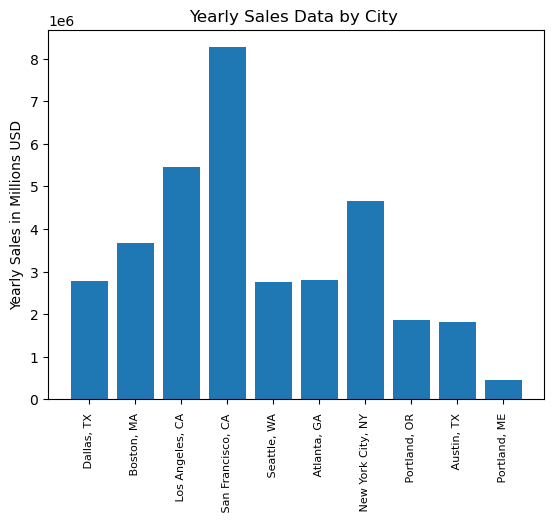

In [17]:
cities = merged_df['Address'].unique()
city_sales = merged_df['Total Sales_sum'].unique()

plt.bar(cities, city_sales)
plt.xticks(cities, rotation=90, size=8)
plt.ylabel('Yearly Sales in Millions USD')
plt.title('Yearly Sales Data by City ')
plt.show()

#### **Answer**

**Most sales:** San Francisco

**Sales Earned:** $8,262,203.91

### Question 4: What time should we display advertisements to maximize the likelihood of customers buying product?

Change the Order Date column to a datetime dtype

In [160]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,Address,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9


In [30]:
columns_drop = ['Month', 'Order ID']
hourly_sales = df.groupby('Hour').sum('Total Sales').drop(columns=columns_drop)
hourly_sales

,Quantity Ordered,Price Each,Total Sales
Hour,,,
0,4428,709296.70,713721.27
1,2619,458490.00,460866.88
2,1398,233833.64,234851.44
3,928,144726.42,145757.89
4,937,162058.18,162661.01
5,1493,229621.21,230679.82
6,2810,445000.11,448113.00
7,4556,740568.11,744854.12
8,7002,1185970.62,1192348.97


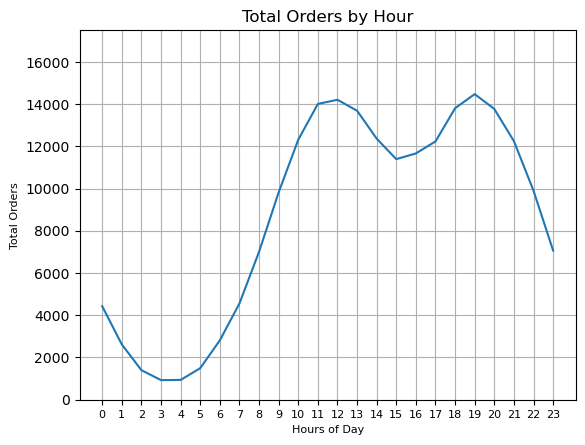

In [59]:
plot = plt.plot(range(0,24), hourly_sales['Quantity Ordered'])
plt.xticks(range(0,24), size=8)
plt.title('Total Orders by Hour')
plt.ylabel('Total Orders', size=8)
plt.xlabel('Hours of Day', size=8)
plt.ylim([0,17500])
plt.grid()
plt.show()

#### **Answer**

**Best Times for Ad:** 

11 AM-1 PM & 7 PM-9 PM 

#### Question 5: What products are most often sold together?

In [113]:
dup_df = df[df['Order ID'].duplicated(keep=False)]
dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
dup_df = dup_df[['Order ID', 'Grouped']].drop_duplicates()

dup_df.head()

C:\Users\churc\AppData\Local\Temp\ipykernel_21396\965451251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_df['Grouped'] = dup_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [115]:
dup_count = dup_df.groupby(['Grouped']).count().sort_values(by='Order ID', ascending=False).head(10)
dup_count
#dup_df = pd.DataFrame(data=dup_count)
#dup_df.sor   t_values(by='Order ID', ascending=False)

,Order ID
Grouped,
"iPhone, Lightning Charging Cable",882
"Google Phone, USB-C Charging Cable",856
"iPhone, Wired Headphones",361
"Vareebadd Phone, USB-C Charging Cable",312
"Google Phone, Wired Headphones",303
"iPhone, Apple Airpods Headphones",286
"Google Phone, Bose SoundSport Headphones",161
"Vareebadd Phone, Wired Headphones",104
"Google Phone, USB-C Charging Cable, Wired Headphones",77


Text(0.5, 0, 'Number of Occurences')

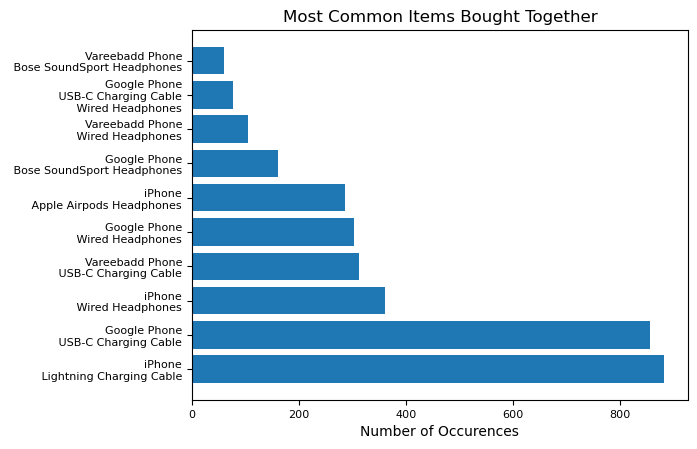

In [155]:
items = ['iPhone, Lightning Charging Cable', 'Google Phone, USB-C Charging Cable', 'iPhone, Wired Headphones', 'Vareebadd Phone, USB-C Charging Cable', 'Google Phone, Wired Headphones', 'iPhone, Apple Airpods Headphones', 'Google Phone, Bose SoundSport Headphones', 'Vareebadd Phone, Wired Headphones', 'Google Phone, USB-C Charging Cable, Wired Headphones', 'Vareebadd Phone, Bose SoundSport Headphones']
items = [label.replace(',', '\n') for label in items]

plt.barh(items, dup_count['Order ID'])
plt.xticks(size=8)
plt.yticks(size=8)
plt.title('Most Common Items Bought Together')
plt.xlabel('Number of Occurences')

#### Question 6: What product sold the most? Why do you think it sold the most?

In [175]:
columns_drop = ['Order ID', 'Month', 'Hour', 'Price Each']
item_pop = df.groupby('Product').sum('Quantity Ordered').sort_values(by='Quantity Ordered', ascending=False).drop(columns=columns_drop)
item_pop

,Quantity Ordered,Total Sales
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
Wired Headphones,20557,246478.43
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
27in FHD Monitor,7550,1132424.50
iPhone,6849,4794300.00


#### **Answer**

**Top Seller:** AAA Batteries (4-pk)

**Why:** I believe this was the top seller because it is a cheaper item when compared against the other items in the data. Also, it is a recurring purchase while most of the other items would be 1 time purchases. This however does not equate to the item that brings in the most money, depending on the profit margin the top earner based on the data is the *Macbook Pro Laptop*. 